In [53]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation
from brainspace.utils.parcellation import map_to_labels 
from brainspace.datasets import load_conte69
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import plotting
import ptitprince as pt
import nibabel as nb
import seaborn as sns

plt.rcParams["pdf.fonttype"]=42  #export as editable text
plt.rcParams["ps.fonttype"]=42
plt.rcParams["svg.fonttype"]="none" #export as editable text
plt.rcParams['axes.linewidth'] = 0.8

## color in Gradient 1 und 2 with functional conn gradient loadings

## functional connectivity gradient 1

In [22]:
#load gradients
gradients=np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradients_lh.npy")
gradient1=gradients[:,0]
gradient2=gradients[:,1]

func_grad=np.load("/Project1_thalamus_gradients/data/functional_connectivity/gradients_left.npy")
func_grad1=func_grad[:,0]
func_grad2=func_grad[:,1]

### plot func grad 1 on thalamus

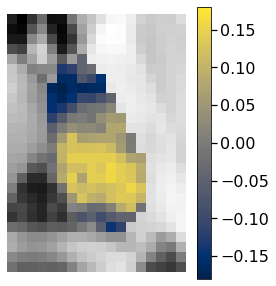

In [35]:
#mni background
mni=nb.load("/afs/.cbs.mpg.de/software/.fsl/6.0.3/debian-bullseye-amd64/data/standard/MNI152_T1_2mm.nii.gz").get_fdata()
slice_mni= mni[42:60,42:68,39]

#thomas atlas in 2mm
func_img_data=nb.load("/Project1_thalamus_gradients/data/functional_connectivity/gradient1_left_tha.nii.gz").get_fdata()
func_img_data[np.where(func_img_data==0)] = np.NaN
#select slice
slice_= func_img_data[42:60,42:68,39]

#plot
fig, ax = plt.subplots(1, figsize=((4,5)))
cax=plt.imshow(slice_mni.T, cmap="gray", origin="lower")
cax=plt.imshow(slice_.T, cmap="cividis", vmin=-0.18, vmax= 0.18, origin="lower")
plt.axis("off")
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.tick_params(labelsize=16)
plt.savefig("/Project1_thalamus_gradients/plots/figure2/func_grad1_on_thalamus_left.pdf", transparent=True, format='pdf', dpi=600)


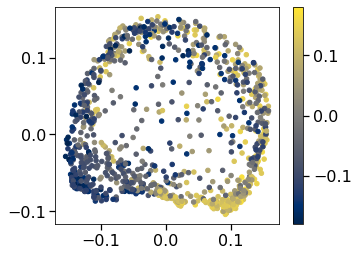

In [36]:
fig, ax=plt.subplots(1, figsize=(5,4))
fig = plt.scatter(gradient1, gradient2, c=func_grad1, cmap="cividis", alpha=1,s=20,
                 vmin=-0.18, vmax=0.18) 
#ax.set_xlabel("gradient 1", fontsize = 22, fontname="Arial", labelpad=8)
#ax.set_ylabel("gradient 2", fontsize = 22, fontname="Arial", labelpad=8)
ax.set_yticks([-0.1,0.0,0.1])
ax.tick_params(labelsize=16)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.savefig("/Project1_thalamus_gradients/plots/figure2/func1_distribution_left.svg", transparent=True, format='svg', dpi=600)

# plot correlation

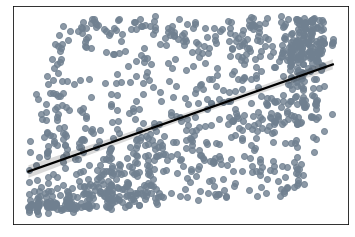

In [37]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["func_g1"]=func_grad1
data["G1"]=gradient1
fig=sns.regplot(x="func_g1", y="G1", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("/Project1_thalamus_gradients/plots/figure2/scatter_func1-g1_left.svg", transparent=True, format='svg', dpi=600)

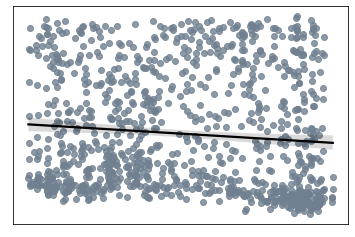

In [38]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["func_g1"]=func_grad1
data["G2"]=gradient2
fig=sns.regplot(x="func_g1", y="G2", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("/Project1_thalamus_gradients/plots/figure2/scatter_func1-g2_left.svg", transparent=True, format='svg', dpi=600)

## functional connectivity gradient 2

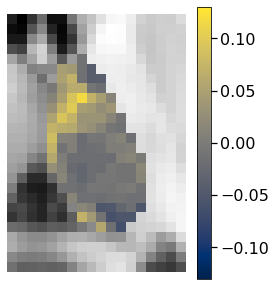

In [39]:
#mni background
mni=nb.load("/afs/.cbs.mpg.de/software/.fsl/6.0.3/debian-bullseye-amd64/data/standard/MNI152_T1_2mm.nii.gz").get_fdata()
slice_mni= mni[42:60,42:68,39]

#thomas atlas in 2mm
func_img_data=nb.load("/Project1_thalamus_gradients/data/functional_connectivity/gradient2_left_tha.nii.gz").get_fdata()
func_img_data[np.where(func_img_data==0)] = np.NaN
#select slice
slice_= func_img_data[42:60,42:68,39]

#plot
fig, ax = plt.subplots(1, figsize=((4,5)))
colormap=sns.cubehelix_palette(start=2, rot=1, dark=0.3, light=0.9, reverse=True, as_cmap=True)
cax=plt.imshow(slice_mni.T, cmap="gray", origin="lower")
cax=plt.imshow(slice_.T, cmap="cividis", origin="lower", vmin=-0.13, vmax=0.13)
plt.axis("off")
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.tick_params(labelsize=16)
plt.savefig("/Project1_thalamus_gradients/plots/figure2/func_grad2_on_thalamus_left.pdf", transparent=True, format='pdf', dpi=600)


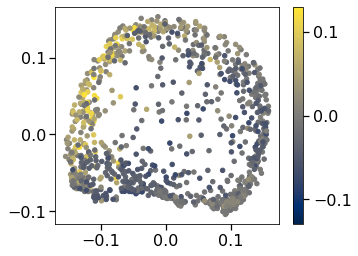

In [40]:
plt.rcParams['axes.linewidth'] = 0.8
fig, ax=plt.subplots(1, figsize=(5,4))
#fig = sns.set_context("notebook", font_scale=1, rc={ 'font.family':'Arial'})

fig = plt.scatter(gradient1, gradient2, c=func_grad2, cmap="cividis", alpha=1,s=20,
                 vmin=-0.13, vmax=0.13) 
#ax.set_xlabel("gradient 1", fontsize = 22, fontname="Arial", labelpad=8)
#ax.set_ylabel("gradient 2", fontsize = 22, fontname="Arial", labelpad=8)
ax.set_yticks([-0.1,0.0,0.1])
ax.tick_params(labelsize=16)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([-0.1,0.0,0.1])


plt.savefig("Project1_thalamus_gradients/plots/figure2/func2_distribution_left.svg", transparent=True, format='svg', dpi=600)

## plot correlations

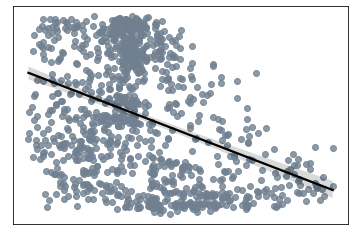

In [41]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["func_g2"]=func_grad2
data["G1"]=gradient1
fig=sns.regplot(x="func_g2", y="G1", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("/Project1_thalamus_gradients/plots/figure2/scatter_func2-g1_left.svg", transparent=True, format='svg', dpi=600)

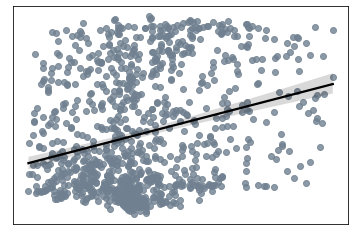

In [42]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["func_g2"]=func_grad2
data["G2"]=gradient2
fig=sns.regplot(x="func_g2", y="G2", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("/Project1_thalamus_gradients/plots/figure2/scatter_func2-g2_left.svg", transparent=True, format='svg', dpi=600)

# Gradients computation plots

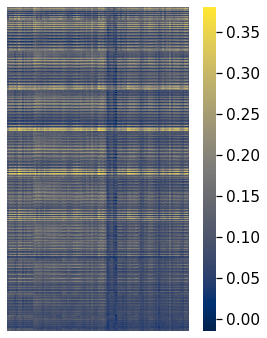

In [43]:
# plot func_conn matrix 
f_conn_matrix_l=np.load("/Project1_thalamus_gradients/data/functional_connectivity/fc_l.npy")

fig, ax = plt.subplots(1, figsize=(4,5))
fig = sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1.5, 'font.family':'Arial'})
fig = sns.heatmap(data=f_conn_matrix_l ,ax = ax,  #vmin=0, vmax=1
                  cbar=True , cbar_kws={"orientation":"vertical","pad":0.06, "aspect":25},
                  cmap="cividis", xticklabels=False, yticklabels=False)
#ax.set_xlabel("cortex parcels", fontname="Arial", labelpad=9, fontsize=23)
#ax.set_ylabel("thalamic seed voxels", fontname="Arial", labelpad=9, fontsize=23)

plt.tight_layout()
plt.savefig("/Project1_thalamus_gradients/plots/figure3/func_conn_matrix_lh.png", transparent=True, format='png', dpi=600)


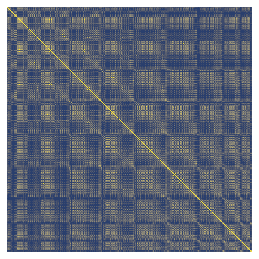

In [61]:
#load affinity matrix, gradients,struc_connectivity matrix
affinity = np.load("/Project1_thalamus_gradients/data/functional_connectivity/affinity.npy") 
fig, ax = plt.subplots(1, figsize=(4.5,4.5))
fig = sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5, 'font.family':'Arial'})
fig = sns.heatmap(data=affinity ,ax =ax, vmin=0.4, vmax=1,
                  cbar_kws={"orientation":"horizontal","pad":0.08},
                  square=True,
                  cmap="cividis", cbar=False ,xticklabels=False, yticklabels=False)

plt.savefig("/Project1_thalamus_gradients/plots/figure2/func_affinity.png", transparent=True, format='png', dpi=600)

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  if __name__ == "__main__":


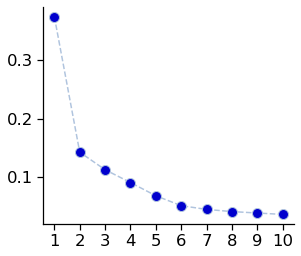

In [64]:
#import lambdas 
lambdas=np.load("/Project1_thalamus_gradients/data/functional_connectivity/lambdas_lh.npy")
fig = sns.set_context("notebook", font_scale=1.5, rc={ 'font.family':'Arial'})
lambdas=lambdas/lambdas.sum()  #they need to add up to 1
fig, ax = plt.subplots(1, figsize=(4.5, 4))
num_lambdas=np.arange(1,11,1)
fig = plt.plot(num_lambdas, lambdas,"-o",color="lightsteelblue",
              markerfacecolor="mediumblue",
              markeredgecolor="lightsteelblue", markersize=10, linestyle="dashed")
#ax.set_xlabel('components', fontname="Arial", labelpad=8,fontsize=24) 
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])

#ax.set_ylabel('eigenvalues', fontname="Arial", labelpad=8,fontsize=24)
ax.set_yticks([0.1,0.2,0.3])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.savefig("/Project1_thalamus_gradients/plots/figure2/func_screeplot_lambdas.pdf", transparent=True, format='pdf', dpi=600)